In [3]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB



# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [4]:
df = pd.read_csv('heartdisease.csv')

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
y = df.TenYearCHD
#df=df.drop('TenYearCHD', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.40, random_state=50)

<Axes: xlabel='TenYearCHD', ylabel='count'>

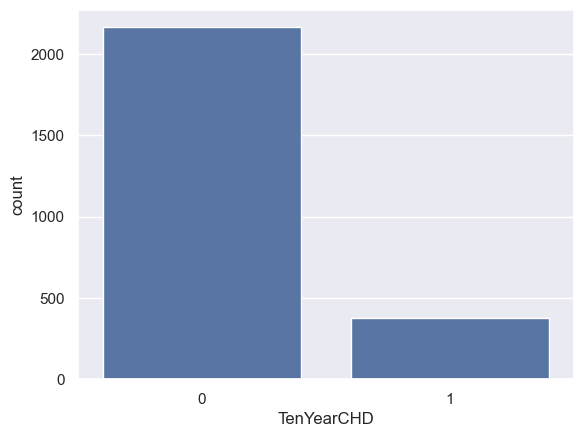

In [7]:
sns.countplot(x='TenYearCHD', data=X_train)

Takeaway: In the Training set, More people do not have TenYearCHD than do have it.

<Axes: xlabel='male', ylabel='count'>

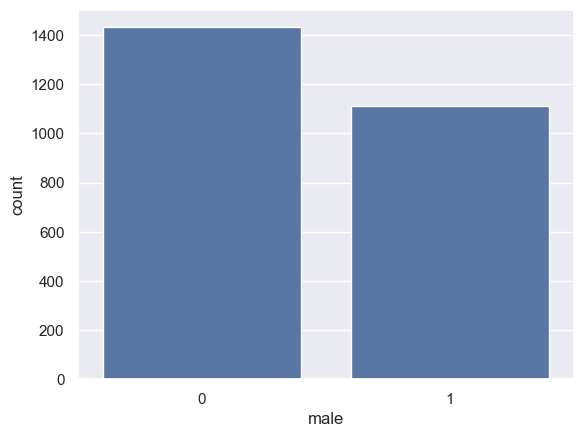

In [9]:
sns.countplot(x='male', data=X_train)

This visualization helps in understanding the gender distribution among the individuals in the sample, highlighting that the dataset has a slightly higher number of females compared to males. 


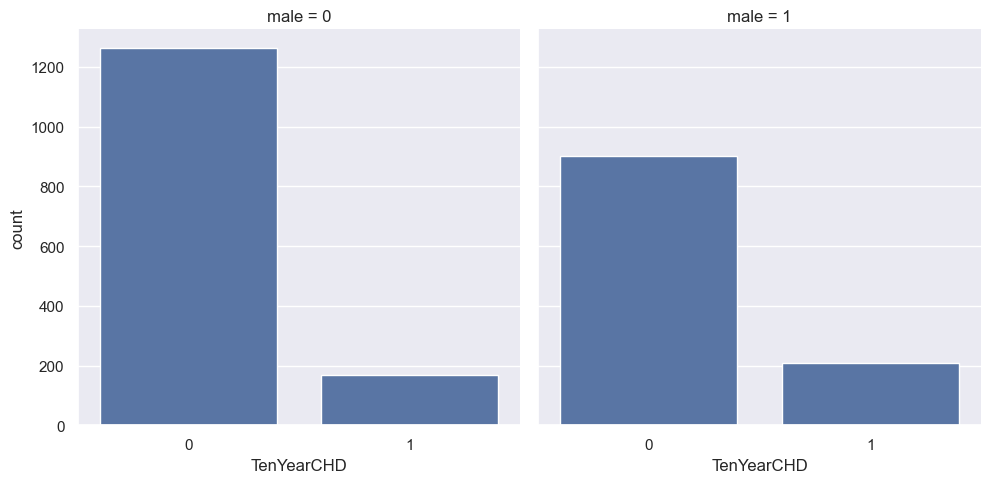

In [11]:
sns.catplot(x='TenYearCHD', col='male', kind='count', data=X_train)

This visualization helps to compare the distribution of TenYearCHD risk among males and females, highlighting that most individuals in both gender groups are not at risk of CHD, with females slightly outnumbering males in the no-risk category. However, men are more likely to have CHD. 


In [13]:
print(X_train[X_train.male == 0].TenYearCHD.sum()/X_train[X_train.male == 0].TenYearCHD.count())
print(X_train[X_train.male == 1].TenYearCHD.sum()/X_train[X_train.male == 1].TenYearCHD.count())

0.1180167597765363
0.18828828828828828


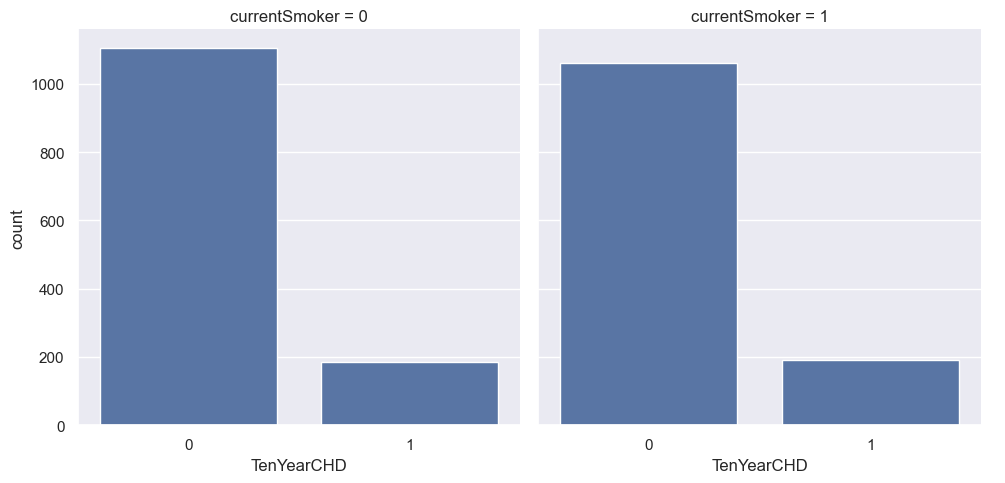

In [14]:
sns.catplot(x='TenYearCHD', col='currentSmoker', kind='count', data=X_train)

This visualization helps to compare the distribution of Ten-YearCHD risk among smokers and non-smokers. The distribution pattern is similar for both smokers and non-smokers, with a significantly higher count of individuals in the no-risk category compared to the at-risk category. The count of non-smokers without CHD risk appears to be higher than the count of smokers without CHD risk. Both non-smokers and smokers have a relatively small number of individuals at risk of CHD. 


In [16]:
print(X_train[X_train.currentSmoker == 0].TenYearCHD.sum()/X_train[X_train.currentSmoker == 0].TenYearCHD.count())
print(X_train[X_train.currentSmoker == 1].TenYearCHD.sum()/X_train[X_train.currentSmoker == 1].TenYearCHD.count())

0.14418604651162792
0.15335463258785942


Takeaway: Being a current smoker does have a significant impact on Ten Year CHD

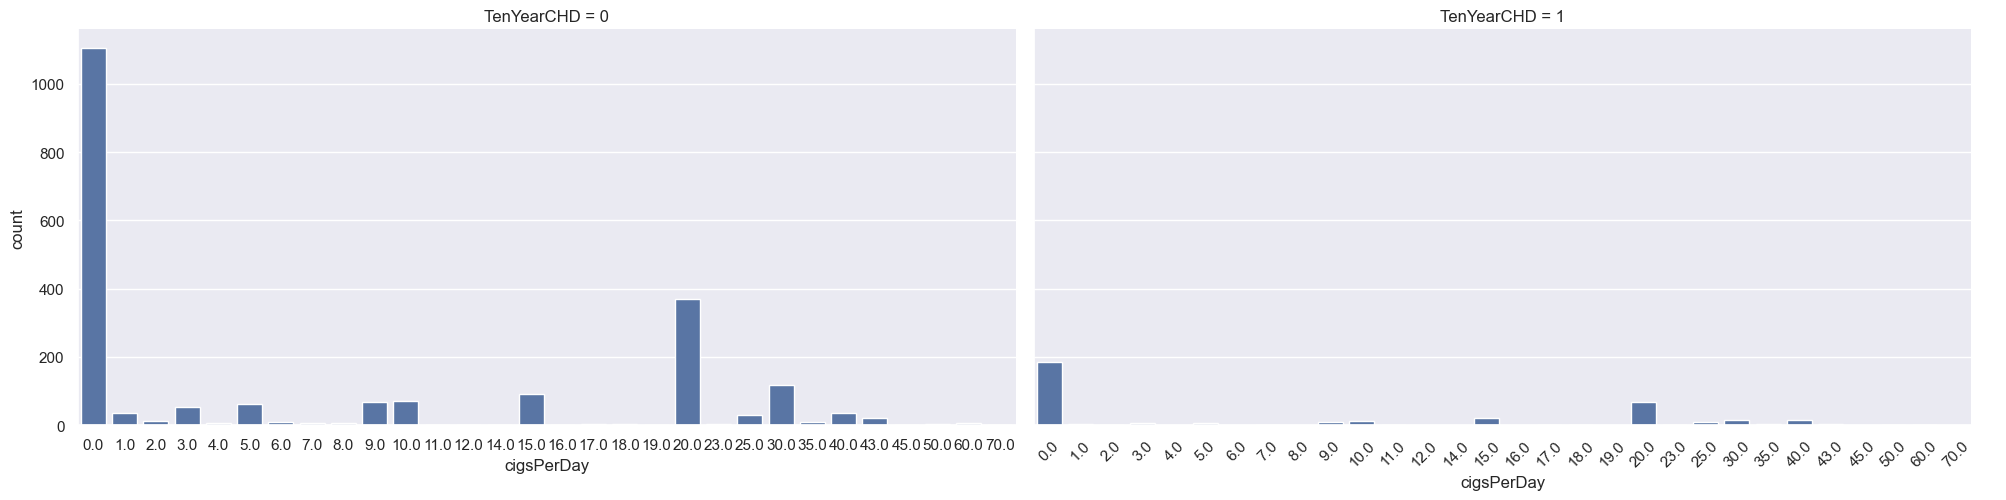

In [18]:
sns.catplot(x='cigsPerDay', col='TenYearCHD', kind='count', data=X_train, height=5, aspect=2)
plt.xticks(rotation=45)
plt.show()

This visualization helps to compare the distribution of Ten-YearCHD risk among those who smoke cigarettes and how many cigarettes are smoked per day. The distribution pattern is drastically different for those with CHD compared to those who do not have CHD. Those do not have CHD tend to smoke more cigarettes per day compared to those with CHD.


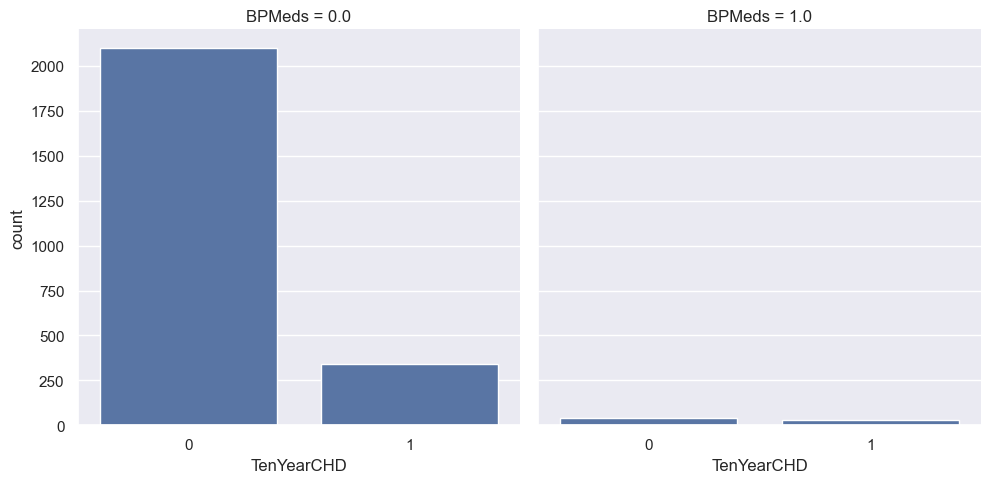

In [20]:
sns.catplot(x='TenYearCHD', col='BPMeds', kind='count', data=X_train)

This visualization helps to compare the distribution of Ten-YearCHD risk among individuals based on whether they are taking blood pressure medication, highlighting that most individuals not taking BP medication are not at risk of CHD, and there are very few individuals who are taking BP medication.

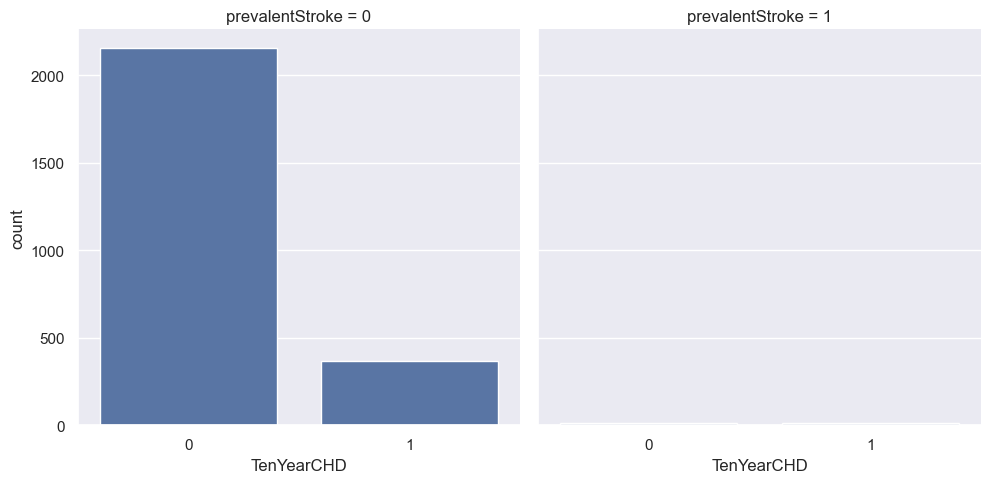

In [22]:
sns.catplot(x='TenYearCHD', col='prevalentStroke', kind='count', data=X_train)

This visualization helps to compare the distribution of Ten-Year CHD risk among individuals based on their stroke prevalence, highlighting that most individuals without a stroke are not at risk of CHD, and the population of individuals with a stroke is very small.


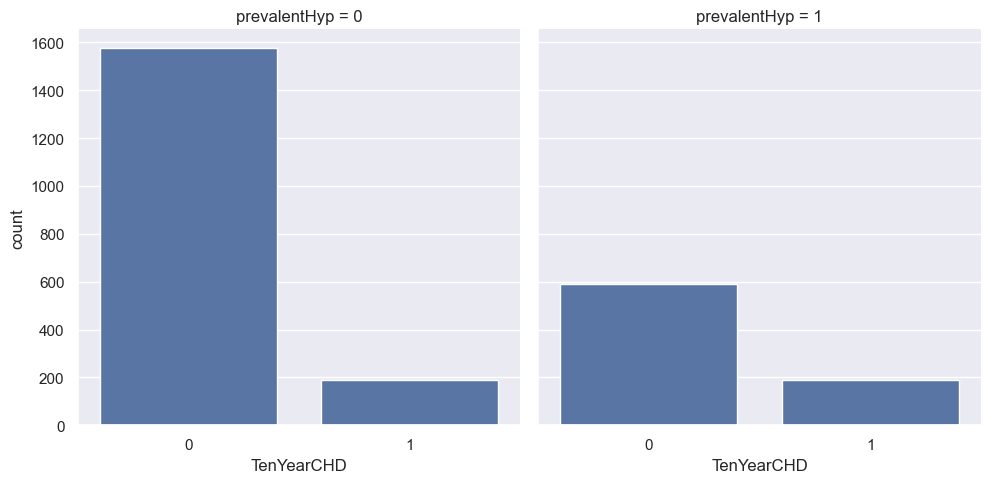

In [24]:
sns.catplot(x='TenYearCHD', col='prevalentHyp', kind='count', data=X_train)

This visualization helps to compare the distribution of Ten-YearCHD risk among people with prevalent hypertension compared to those without prevalent hypertension. According to the distribution presented in the graphs above, those who have prevalent hypertension seem to have an equally likely chance of CHD. While the counts between having hypertension and not having hypertension are very close in number, there is a greater proportion of the population who do not have hypertension and also do not have CHD.

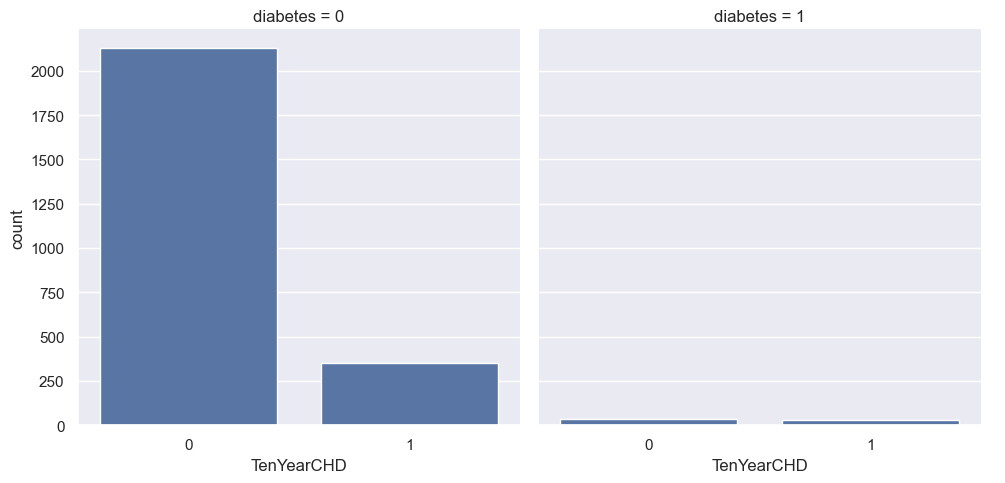

In [26]:
sns.catplot(x='TenYearCHD', col='diabetes', kind='count', data=X_train)

This visualization helps to compare the distribution of Ten-YearCHD risk among those with diabetes and those without diabetes. According to the distributions, most of the population does not have diabetes. Of those without diabetes, it is more likely for those to not have CHD. 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [29]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Cleaning the Data

**Replace by Mean:**
- education: 105 missing data points
- totChol: 140 missing data points
- BMI: 19 missing data points
- heartRate: 1 missing data point
- glucose: 388 missing data points
- cigsPerDay: 29 missing data points

**Replace by Mode**
- BPMeds: 143 missing data points

In [32]:
avg_education = df['education'].mean()
avg_totChol = df['totChol'].mean()
avg_BMI = df['BMI'].mean()
avg_heartRate = df['heartRate'].mean()
avg_glucose = df['glucose'].mean()
avg_cigsPerDay = df['cigsPerDay'].mean()

print("Average Education:", avg_education)
print("Average Total Cholesterol", avg_totChol)
print("Average BMI", avg_BMI)
print("Average Heart Rate", avg_heartRate)
print("Average Glucose", avg_glucose)
print("Average CigsPerDay", avg_cigsPerDay)

Average Education: 1.9789499153157513
Average Total Cholesterol 236.72158548233045
Average BMI 25.80200758473572
Average Heart Rate 75.87892376681614
Average Glucose 81.96675324675324
Average CigsPerDay 9.003088619624615


In [33]:
df['education'].replace(np.nan, avg_education, inplace = True)
df['totChol'].replace(np.nan, avg_totChol, inplace = True)
df['BMI'].replace(np.nan, avg_BMI, inplace = True)
df['heartRate'].replace(np.nan, avg_heartRate, inplace = True)
df['glucose'].replace(np.nan, avg_glucose, inplace = True)
df['cigsPerDay'].replace(np.nan, avg_cigsPerDay, inplace = True)

C:\Users\bychu\AppData\Local\Temp\ipykernel_32540\1152785629.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].replace(np.nan, avg_education, inplace = True)
C:\Users\bychu\AppData\Local\Temp\ipykernel_32540\1152785629.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [34]:
df['BPMeds'].value_counts()

BPMeds
0.0    4061
1.0     124
Name: count, dtype: int64

In [35]:
mode_BPMeds = df['BPMeds'].mode().values[0]
print('mode BPMeds =', mode_BPMeds)

mode BPMeds = 0.0


In [36]:
df['BPMeds'].replace(np.nan, mode_BPMeds, inplace = True)

C:\Users\bychu\AppData\Local\Temp\ipykernel_32540\78448460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BPMeds'].replace(np.nan, mode_BPMeds, inplace = True)


In [37]:
df['TenYearCHD'] = df['TenYearCHD'].map({'1': True, '0': False})

## Cutting the columns into Quantiles

In [39]:
columns_to_convert = ['male','currentSmoker', 'prevalentStroke', 'diabetes','BPMeds','TenYearCHD']

for column in columns_to_convert:
    df[column] = df[column].astype(bool)

print(df.dtypes)

male                  bool
age                  int64
education          float64
currentSmoker         bool
cigsPerDay         float64
BPMeds                bool
prevalentStroke       bool
prevalentHyp         int64
diabetes              bool
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD            bool
dtype: object


In [40]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,True,39,4.0,False,0.0,False,False,0,False,195.0,106.0,70.0,26.97,80.0,77.0,True
1,False,46,2.0,False,0.0,False,False,0,False,250.0,121.0,81.0,28.73,95.0,76.0,True
2,True,48,1.0,True,20.0,False,False,0,False,245.0,127.5,80.0,25.34,75.0,70.0,True
3,False,61,3.0,True,30.0,False,False,1,False,225.0,150.0,95.0,28.58,65.0,103.0,True
4,False,46,3.0,True,23.0,False,False,0,False,285.0,130.0,84.0,23.10,85.0,85.0,True


## CigsPerDay

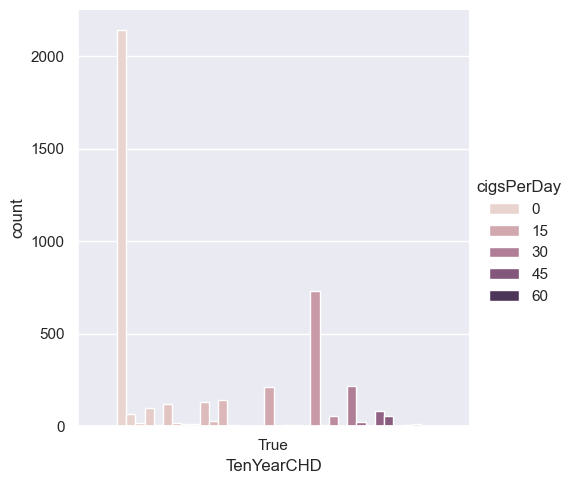

In [42]:
sns.catplot(x='TenYearCHD', hue='cigsPerDay', kind='count', data=df)

There are significantly more individuals who did not develop CHD compared to those who did. Among individuals who did not develop CHD, the count of those who smoked 35 or fewer cigarettes is higher compared to those who smoked 35 or more cigarettes. Similarly, among individuals who did develop CHD, the count of those who smoked 35 or fewer cigarettes is also higher, but the difference is less pronounced compared to those who smoked 35 or more cigarettes. 


## Age 

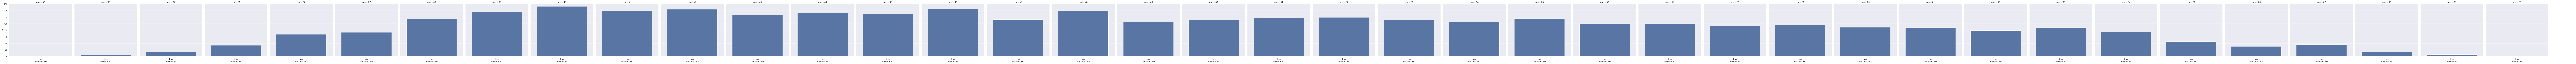

In [45]:
sns.catplot(x='TenYearCHD', col='age', kind='count', data=df)

 In all three age groups, there are more individuals who did not develop CHD compared to those who did. The count of individuals without CHD is highest in the middle age group, followed by the oldest and youngest age groups. The count of individuals with CHD is also highest in the middle age group, followed by the oldest and youngest age groups.

## Total Cholesterol

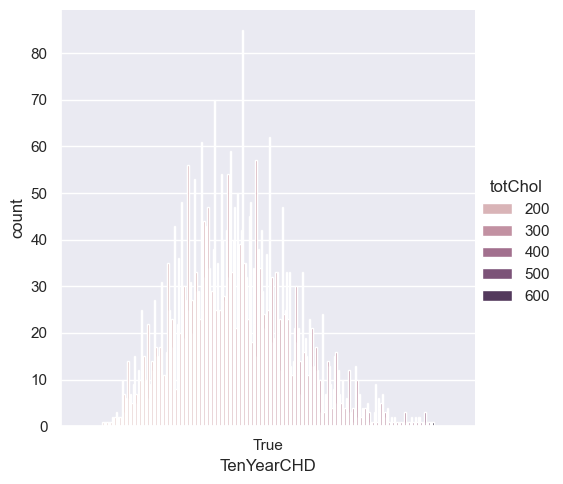

In [48]:
sns.catplot(x='TenYearCHD', hue='totChol', kind='count', data=df)

There are more individuals who did not develop CHD compared to those who did. Among individuals who did not develop CHD, the count is fairly distributed among the three cholesterol levels, with the highest count in the middle cholesterol category. Among individuals who did develop CHD, the count is also fairly distributed among the three cholesterol levels, with the high cholesterol category having the highest count, followed by the middle and low. The disparity in the count of individuals with different cholesterol levels is more noticeable in those who did develop CHD, indicating a potential correlation between higher cholesterol levels and the likelihood of developing CHD. 


## SysBP

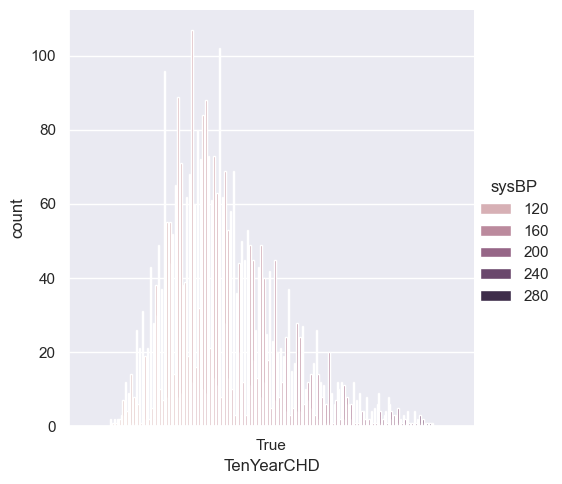

In [51]:
sns.catplot(x='TenYearCHD', hue='sysBP', kind='count', data=df)

There are more individuals who did not develop CHD compared to those who did. Among individuals who did not develop CHD, the highest count is in the middle systolic blood pressure, followed by low and high. The disparity in the count of individuals with different systolic blood pressure levels is more noticeable in those who did develop CHD, indicating a potential correlation between higher systolic blood pressure levels and the likelihood of developing CHD.

## DiaBP

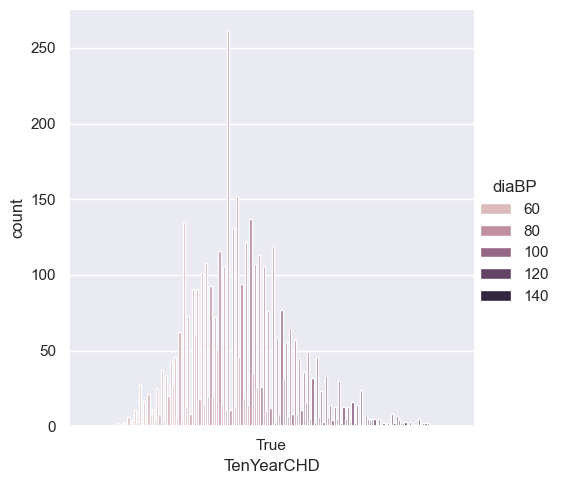

In [54]:
sns.catplot(x='TenYearCHD', hue='diaBP', kind='count', data=df)

There are more individuals who did not develop CHD compared to those who did. Among individuals who did develop CHD, the highest count is in the high diastolic blood pressure category, followed by the low then middle category. The disparity in the count of individuals with different diastolic blood pressure levels is less noticeable compared to systolic blood pressure. Upon those without CHD, the majority of participants had low diastolic pressure, while those with CHD had a majority of high diastolic pressure. 

## BMI

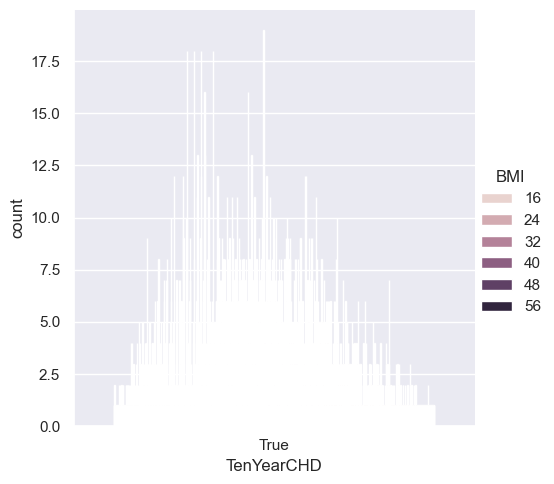

In [57]:
sns.catplot(x='TenYearCHD', hue='BMI', kind='count', data=df)

There are more individuals who did not develop CHD compared to those who did. Among individuals who did not develop CHD, the highest count is low BMI, they are considerably close to middle and high. The disparity in the count of individuals with BMI is more noticeable in those who did develop CHD, showing a potential correlation between higher BMI levels and the likelihood of developing CHD.

## Heart Rate

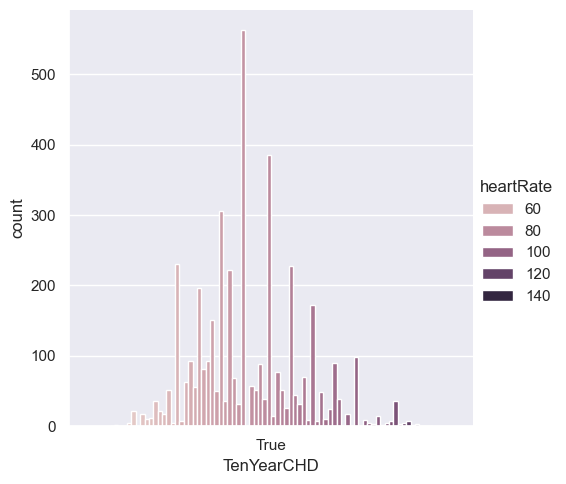

In [60]:
sns.catplot(x='TenYearCHD', hue='heartRate', kind='count', data=df)

There are more individuals who did not develop CHD compared to those who did when analyzing heart rate. Among individuals who did not develop CHD, the majority of participants had a low heart rate, with high heart rates following, and then middle. Of those who do not have CHD, the same pattern of heart rate remains. Due to the nature of both participants with and without CHD have the same heart rate patterns, there is no known correlation between CHD and hear rate. 




## Glucose

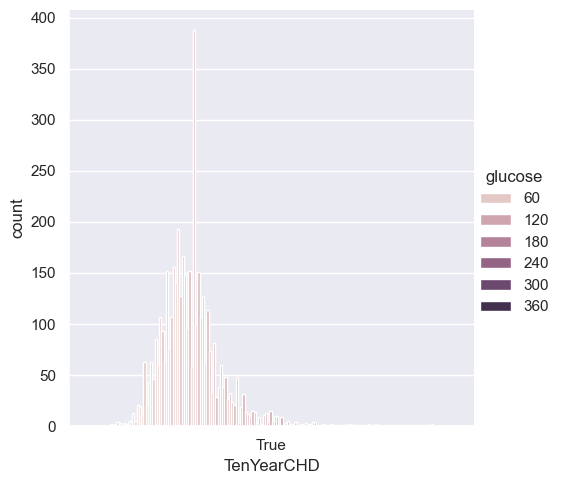

In [63]:
sns.catplot(x='TenYearCHD', hue='glucose', kind='count', data=df)

 There are more individuals who did not develop CHD compared to those who did when analyzing heart rate. Among individuals who did not develop CHD, the majority of participants had low glucose levels. Contrary, those with CHD had more participants with high glucose levels. This shows that there may be a potential correlation between CHD and high glucose. 

## Dropping non-binary columns

In [66]:
df.drop(['age', 'cigsPerDay', 'education', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'], axis=1, inplace=True)

In [67]:
df.head()

,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,True,False,False,False,0,False,True
1,False,False,False,False,0,False,True
2,True,True,False,False,0,False,True
3,False,True,False,False,1,False,True
4,False,True,False,False,0,False,True


## Split data 

In [69]:
y = df.TenYearCHD
X = df.drop('TenYearCHD', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.40, random_state=50)

In [70]:
X_train = X_train.values.reshape(-1,1)
x_test = X_test.values.reshape(-1,1)

In [71]:
regr = linear_model.LinearRegression()

In [72]:
X = pd.DataFrame(np.random.rand(4238, 7))
y = pd.Series(np.random.rand(4238))

In [73]:
# Ensure numpy values are in place
X = X.to_numpy()
y = y.to_numpy()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.40, random_state=50)

In [75]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [76]:
print('Coefficients:', regr.coef_)
mse= mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination:', r2)

Coefficients: [-0.01008083  0.00308621 -0.01493412 -0.04876666  0.00070385  0.00422895
  0.        ]
Mean Squared Error: 0.08048613632752061
Coefficient of determination: -0.0003416477381332772


In [77]:
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [78]:
nan_count = X_train.isna().sum().sum()
inf_count = (~X_train.apply(np.isfinite)).sum().sum()

nan_count, inf_count

(0, 0)

In [79]:
# Ensure the target variable is encoded as integers (discrete class labels)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Instantiate a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Create the predicted tags
pred = nb_classifier.predict(X_test)

# Calculate the accuracy score
score = accuracy_score(y_test, pred)
print("Accuracy Score:", score)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred, labels=[True, False])
print("Confusion Matrix:\n", cm)


Accuracy Score: 1.0
Confusion Matrix:
 [[   0    0]
 [   0 1696]]


Confusion matrix, without normalization


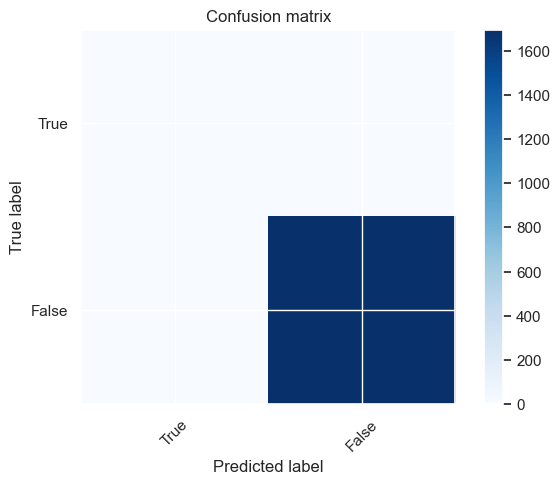

In [80]:
plot_confusion_matrix(cm, classes=['True', 'False'])
plt.show()

#### According to the graph, the model produced a False negative, meaning it incorrectly predicted a negative outcome when the actual outcome was positive.

In [82]:
x = df[['male','currentSmoker']]
y = df['TenYearCHD']

In [83]:
y.head()

0    True
1    True
2    True
3    True
4    True
Name: TenYearCHD, dtype: bool

In [84]:
x.head()

,male,currentSmoker
0,True,False
1,False,False
2,True,True
3,False,True
4,False,True


In [85]:
X_train, X_test = X[:-90], X[-90:]
y_train, y_test = y[:-90], y[-90:]

In [86]:
df_X = pd.DataFrame(X, columns=['male',	'currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD'])

In [87]:
rf_model = RandomForestRegressor(n_estimators =100, max_depth = 5, bootstrap= True)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [88]:
y_pred = rf_model.predict(X_test)

In [89]:
mse= mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print('R_squared:', r2)

Mean Squared Error: 0.0
R_squared: 1.0


#### The mean squared error of 0 indicates that our predictions are an exact match to the actual values. An R_squared value of 1.0 shows that the random forest model explains all the variability in the data perfectly.

### Based on the results of all 3 models, our group decided that the most promising model for our analysis is the Random Forest. 